In [2]:
from google.colab import drive
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split
import random

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data_dir = '/content/drive/My Drive/img'

image_list = []


files = os.listdir(data_dir)

for file in files:
        # Check if the file is a regular file (not a directory)
        if os.path.isfile(os.path.join(data_dir, file)):
            # Add the file name to the list
            image_list.append(str(file))

random.shuffle(image_list)

labels = []
images = []
target_size =(257,257)

for image_file in image_list:
  labels.append(image_file[-5])
  image = Image.open(os.path.join(data_dir, image_file))
  image = image.resize(target_size)
  image_array = np.array(image)
  images.append(image_array)

In [4]:
# Convert the list of strings to a list of integers
labels = [int(num) for num in labels]

labels = np.array(labels)

images = np.array(images)
images.shape

(260, 257, 257, 3)

In [5]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

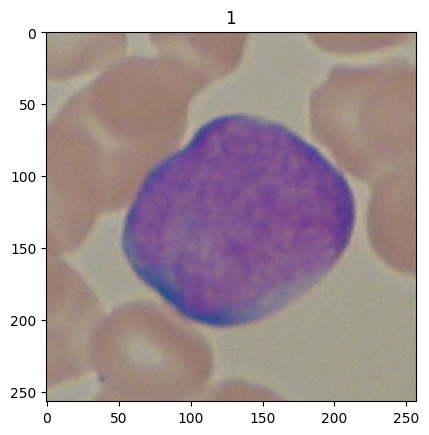

In [6]:
train_labels
len(train_labels)
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.title(train_labels[0])
plt.show()

In [7]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(257, 257, 3))
base_model.trainable=False

num_layers = len(base_model.layers)
num_layers
num_layer_fine_tune=1

for model_layer in base_model.layers[:num_layers - num_layer_fine_tune]:
    print(f"FREEZING LAYER: {model_layer}")
    model_layer.trainable = False

print("\n")
print(f"Configured to fine tune the last", num_layer_fine_tune, "convolutional layers...")
print("\n")

#print(base_model.summary())

87910968/87910968 [==============================] - 0s 0us/step
FREEZING LAYER: <keras.src.engine.input_layer.InputLayer object at 0x7aa09d09a2f0>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7aa09c555db0>
FREEZING LAYER: <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7aa09c556380>
FREEZING LAYER: <keras.src.layers.core.activation.Activation object at 0x7aa09c556d70>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7aa09c556560>
FREEZING LAYER: <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7aa09c557b50>
FREEZING LAYER: <keras.src.layers.core.activation.Activation object at 0x7aa09d0f5630>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7aa09c557d30>
FREEZING LAYER: <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7aa09c556bc0>
FREEZING LAYER: <keras.src.layers.core.activation.Activation object at 0x7a

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input,  GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import tensorflow as tf

input_shape=(257, 257, 3)
inputs = tf.keras.Input(shape=input_shape)
x = preprocess_input(inputs)

x = base_model(x)

xx= GlobalAveragePooling2D()(x)

#The final layer
outputs = Dense(1, activation='sigmoid')(xx)

# The final model.
model_InceptionV3_finetune = Model(inputs, outputs)

In [9]:
model_InceptionV3_finetune.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss="binary_crossentropy",
                    metrics=['accuracy'],
                   )

In [10]:
training_results = model_InceptionV3_finetune.fit(train_images,
                                               train_labels,
                                               epochs=100,
                                               validation_split=0.2,
                                               batch_size=16,  )

Epoch 1/100
11/11 [==============================] - 15s 603ms/step - loss: 0.7259 - accuracy: 0.4398 - val_loss: 0.6950 - val_accuracy: 0.5238
Epoch 2/100
11/11 [==============================] - 1s 58ms/step - loss: 0.6996 - accuracy: 0.5241 - val_loss: 0.6770 - val_accuracy: 0.5714
Epoch 3/100
11/11 [==============================] - 1s 60ms/step - loss: 0.6805 - accuracy: 0.5783 - val_loss: 0.6594 - val_accuracy: 0.5952
Epoch 4/100
11/11 [==============================] - 1s 60ms/step - loss: 0.6622 - accuracy: 0.6265 - val_loss: 0.6463 - val_accuracy: 0.6190
Epoch 5/100
11/11 [==============================] - 1s 62ms/step - loss: 0.6432 - accuracy: 0.6566 - val_loss: 0.6379 - val_accuracy: 0.6905
Epoch 6/100
11/11 [==============================] - 1s 62ms/step - loss: 0.6276 - accuracy: 0.6867 - val_loss: 0.6310 - val_accuracy: 0.6905
Epoch 7/100
11/11 [==============================] - 1s 65ms/step - loss: 0.6111 - accuracy: 0.7169 - val_loss: 0.6186 - val_accuracy: 0.7143
Epoc

In [11]:
loss, accuracy = model_InceptionV3_finetune.evaluate(test_images, test_labels)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

2/2 [==============================] - 6s 3s/step - loss: 0.2890 - accuracy: 0.8654
Test Loss: 0.2890
Test Accuracy: 0.8654
